### **🧠 Customer Spending Analysis using K-Means Clustering**
This notebook explores consumer spending behavior using exploratory data analysis, feature engineering, and K-Means clustering to uncover customer segments.

#### **📦 Step 1: Import Libraries**

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# For cleaner visuals
sns.set(style="whitegrid")


#### **📥 Step 2: Load Dataset**

In [63]:
df = pd.read_csv('data/consumer_spending_data.csv')


#### **🔍 Step 3: Exploratory Data Analysis (EDA)**

First few rows of the dataset:
  Customer ID               Category                 Item  Quantity  \
0   CUST_0159              Groceries                 Milk         1   
1   CUST_0017      Friend Activities  Dinner with Friends         2   
2   CUST_0094  Housing and Utilities           Water Bill         1   
3   CUST_0162                Fitness           Yoga Class         5   
4   CUST_0129                  Gifts              Flowers         3   

   Price Per Unit  Total Spent  Payment Method    Location Transaction Date  
0            1.28         1.28      Debit Card  Mobile App       2024-11-13  
1           74.69       149.39      Debit Card    In-store       2023-05-04  
2           76.06        76.06  Digital Wallet  Mobile App       2023-12-16  
3           11.24        56.18            Cash    In-store       2024-01-28  
4           43.71       131.12      Debit Card    In-store       2023-07-28  

Summary of the dataset:
           Quantity  Price Per Unit    Total Spen

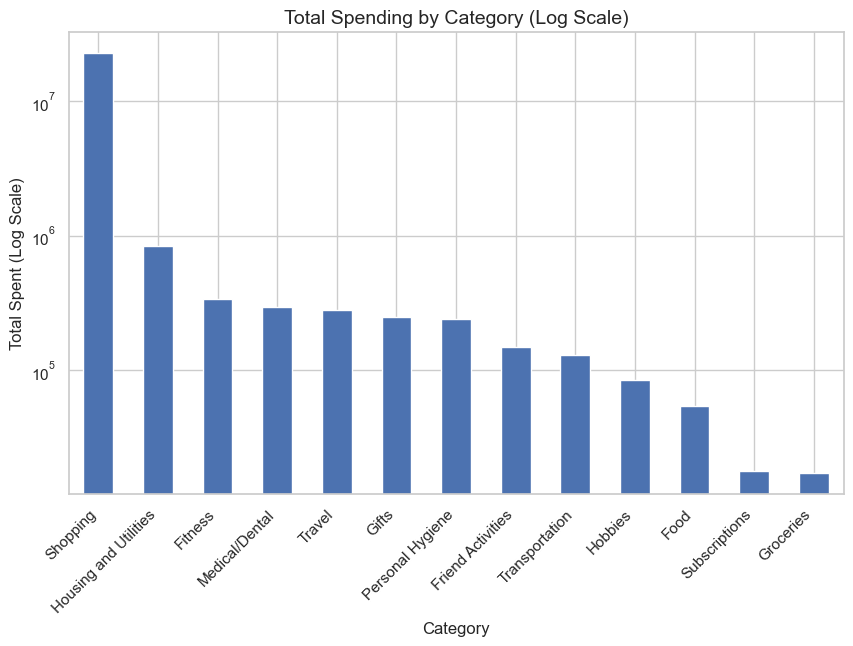

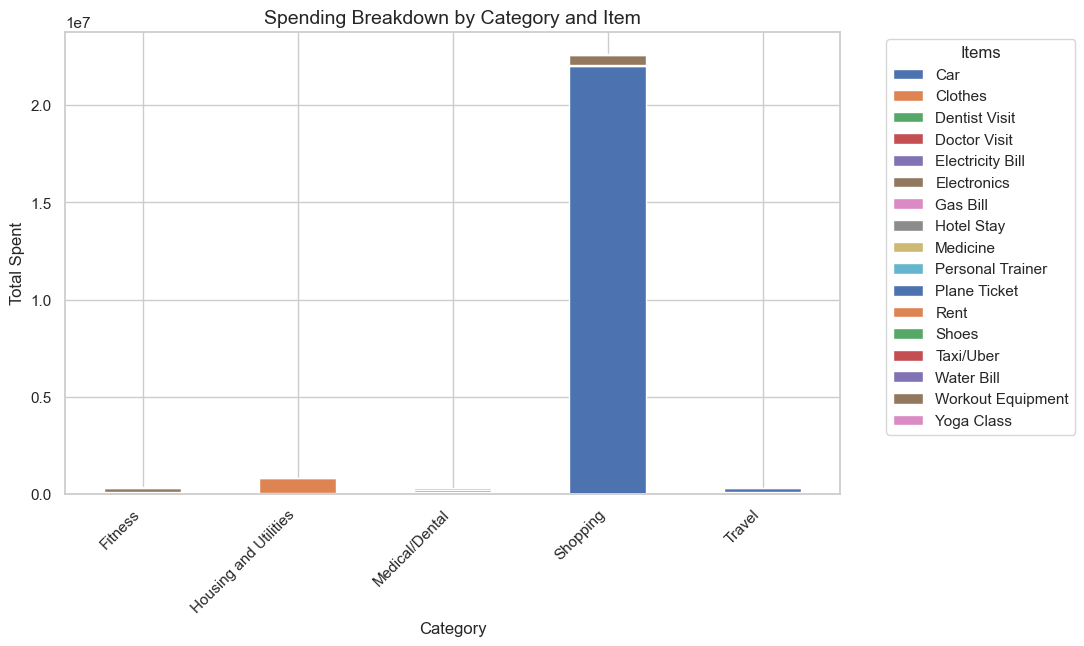

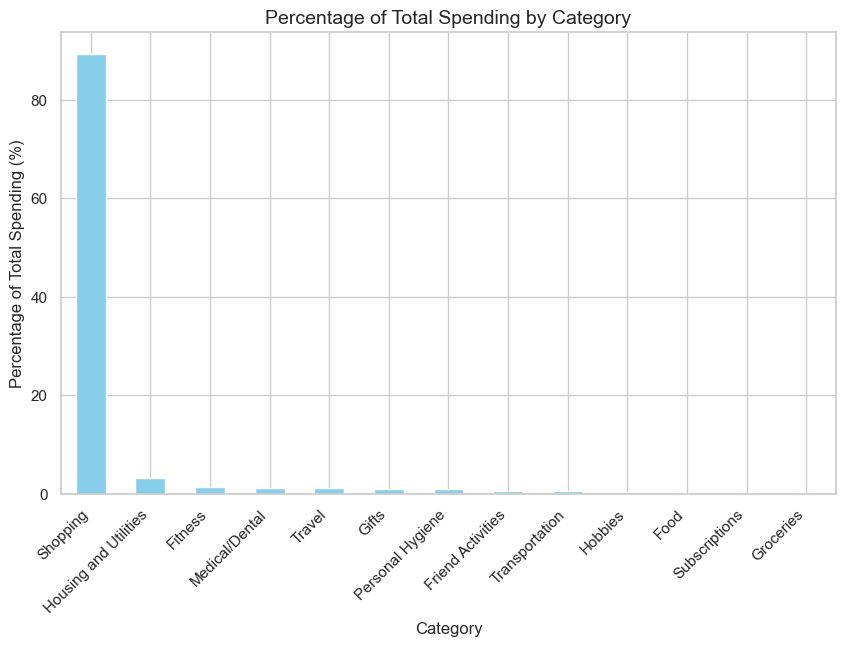

In [64]:

    print("First few rows of the dataset:")
    print(df.head())

    print("\nSummary of the dataset:")
    print(df.describe())

    print("\nMissing values per column:")
    print(df.isnull().sum())

    print("Dropping rows with missing data (if any)")
    print(df.dropna(inplace=True))

    print("\nData types of columns:")
    print(df.dtypes)

# Data Distribution
# Spending Patterns by Category:
#Total Spending by Category: Categories such as Groceries, Shopping, and Travel likely dominate the spending due to common purchases. A breakdown of spending by category can reveal which categories contribute most to total spending.

category_spending = df.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)
category_spending

import matplotlib.pyplot as plt
import numpy as np

# Log-Scale Bar Chart
category_spending = df.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)

# Plotting the bar chart with a logarithmic scale on y-axis
plt.figure(figsize=(10, 6))
category_spending.plot(kind='bar')
plt.yscale('log')  # Apply logarithmic scale
plt.title('Total Spending by Category (Log Scale)', fontsize=14)
plt.ylabel('Total Spent (Log Scale)', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

# Let's focus on top categories for a stacked bar chart
top_categories = category_spending.head(5).index

# Filtering the dataframe for those categories
df_top_categories = df[df['Category'].isin(top_categories)]

# Creating a pivot table for the stacked bar chart
category_item_spending = df_top_categories.groupby(['Category', 'Item'])['Total Spent'].sum().unstack()

# Plotting the stacked bar chart
category_item_spending.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Spending Breakdown by Category and Item', fontsize=14)
plt.ylabel('Total Spent', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Items', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Normalized (percentage) bar chart
category_percentage_spending = category_spending / category_spending.sum() * 100

# Plotting the normalized bar chart
plt.figure(figsize=(10, 6))
category_percentage_spending.plot(kind='bar', color='skyblue')
plt.title('Percentage of Total Spending by Category', fontsize=14)
plt.ylabel('Percentage of Total Spending (%)', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()





#### **🛠️ Step 4: Feature Engineering**

In [65]:

print(df.head())

# Convert 'Transaction Date' to datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Recency: Time since the last transaction (in days)
df['Recency'] = (df['Transaction Date'].max() - df['Transaction Date']).dt.days

# Transaction Frequency: Number of transactions per customer
transaction_freq = df.groupby('Customer ID')['Transaction Date'].count()
df['Transaction Frequency'] = df['Customer ID'].map(transaction_freq)

# Average Spending: Average spending per transaction for each customer
avg_spending = df.groupby('Customer ID')['Total Spent'].mean()
df['Average Spending'] = df['Customer ID'].map(avg_spending)

# Total Spending by Category: Sum of spending for each customer by category
category_spending = df.groupby(['Customer ID', 'Category'])['Total Spent'].sum().unstack(fill_value=0)
df = df.join(category_spending, on='Customer ID')

# Temporal Features: Hour and Weekday from 'Transaction Date'
df['Hour'] = df['Transaction Date'].dt.hour
df['Weekday'] = df['Transaction Date'].dt.weekday  # Monday=0, Sunday=6

# One-Hot Encode categorical variables (Payment Method, Location)
df = pd.get_dummies(df, columns=['Payment Method', 'Location'], drop_first=True)

# Check the transformed DataFrame
print(df.head())




  Customer ID               Category                 Item  Quantity  \
0   CUST_0159              Groceries                 Milk         1   
1   CUST_0017      Friend Activities  Dinner with Friends         2   
2   CUST_0094  Housing and Utilities           Water Bill         1   
3   CUST_0162                Fitness           Yoga Class         5   
4   CUST_0129                  Gifts              Flowers         3   

   Price Per Unit  Total Spent  Payment Method    Location Transaction Date  
0            1.28         1.28      Debit Card  Mobile App       2024-11-13  
1           74.69       149.39      Debit Card    In-store       2023-05-04  
2           76.06        76.06  Digital Wallet  Mobile App       2023-12-16  
3           11.24        56.18            Cash    In-store       2024-01-28  
4           43.71       131.12      Debit Card    In-store       2023-07-28  
  Customer ID               Category                 Item  Quantity  \
0   CUST_0159              Groceri

#### **📊 Step 5: Clustering**

Index(['Customer ID', 'Category', 'Item', 'Quantity', 'Price Per Unit',
       'Total Spent', 'Transaction Date', 'Recency', 'Transaction Frequency',
       'Average Spending', 'Fitness', 'Food', 'Friend Activities', 'Gifts',
       'Groceries', 'Hobbies', 'Housing and Utilities', 'Medical/Dental',
       'Personal Hygiene', 'Shopping', 'Subscriptions', 'Transportation',
       'Travel', 'Hour', 'Weekday', 'Payment Method_Credit Card',
       'Payment Method_Debit Card', 'Payment Method_Digital Wallet',
       'Location_Mobile App', 'Location_Online'],
      dtype='object')


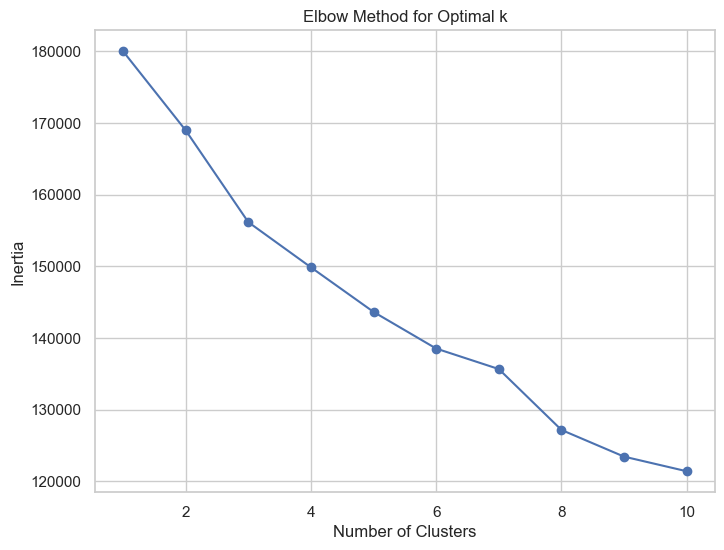

  Customer ID  Cluster
0   CUST_0159        3
1   CUST_0017        3
2   CUST_0094        2
3   CUST_0162        0
4   CUST_0129        3


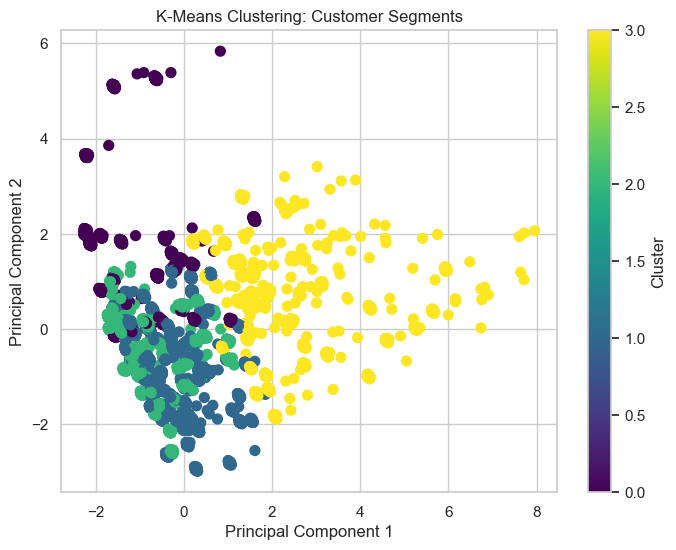

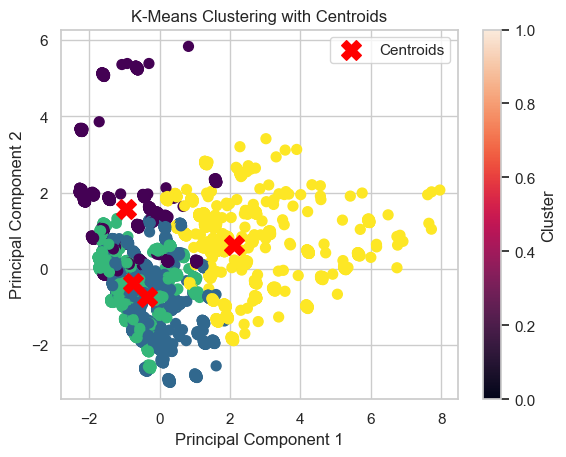

Cluster Centers (in original feature space):
   Total Spent   Recency  Transaction Frequency  Average Spending   Fitness  \
0    -0.078267  0.013308               1.228210         -0.320649 -0.254779   
1    -0.090316 -0.006893              -0.386227         -0.466202  0.324268   
2    -0.078639  0.000168              -0.050127         -0.419129 -0.341818   
3     0.300006  0.002685              -0.117377          1.505570 -0.012040   

       Food  Friend Activities     Gifts  Groceries   Hobbies  \
0  0.052854           0.099684  0.420630   0.919682  0.641739   
1 -0.130400           0.214446  0.078859  -0.237452 -0.309540   
2  0.061656          -0.394111 -0.168824  -0.348411  0.191862   
3  0.123483          -0.006729 -0.241740   0.167094 -0.114924   

   Housing and Utilities  Medical/Dental  Personal Hygiene  Shopping  \
0               0.097525        0.314842          1.337970 -0.247552   
1              -0.595399       -0.067093         -0.253431 -0.478130   
2               1

In [67]:
print(df.columns)

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming df is your DataFrame
# Example: df = pd.read_csv('your_data.csv')

# Select relevant columns for clustering (e.g., spending, transaction frequency, etc.)
features = ['Total Spent', 'Recency', 'Transaction Frequency', 'Average Spending',
            'Fitness', 'Food', 'Friend Activities', 'Gifts', 'Groceries', 
            'Hobbies', 'Housing and Utilities', 'Medical/Dental', 'Personal Hygiene',
            'Shopping', 'Subscriptions', 'Transportation', 'Travel', 'Hour', 'Weekday']
df_clustering = df[features]

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Elbow Method to find optimal number of clusters
inertia = []
k_range = range(1, 11)  # Testing k values from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow Method, choose the optimal number of clusters (e.g., k = 4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Save the updated dataframe with clusters to a new CSV file
df.to_csv('customer_clusters.csv', index=False)

# Print the first few rows of the DataFrame with the added cluster labels
print(df[['Customer ID', 'Cluster']].head())

# 2D Visualization using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Create a scatter plot of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering: Customer Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Optional: Plot Cluster Centers in the 2D PCA space (for understanding the centroids)
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

# Optional: Display the cluster centers in original space (before PCA)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("Cluster Centers (in original feature space):")
print(cluster_centers)




